# Dimensionality reduction

### single line explanation:

$$ X_{n \times m} \rightarrow X^{\text{reduced}}_{n \times k},\ \ \  \text{s.t.} \ \ \  k < m$$
                        
                                                  ???

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

plt.rc('font', **{'size':18})
np.set_printoptions(suppress=True)

# Example 1. Cameras


![](https://downloader.disk.yandex.ru/preview/c30af34bc0b0df1954f46c078e9ea6b957d8f7d91ab7718f340772ac27e8c69d/5f7480bd/ni8R4XFI7VXNAaXgVS9LS__u67eNfwyKuWtVOGefoDkHAC2FTqxLEwKtTFPhwRrzdqV_ufs_NeVpjB9Z3N2J5w==?uid=0&filename=Screenshot+from+2020-09-30+11-57-11.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&tknv=v2&owner_uid=159868851&size=2048x2048)

original paper (PCA tutorial) https://arxiv.org/pdf/1404.1100.pdf (highly recommended for reading)

In [2]:
df = pd.read_csv('camera_points.csv')

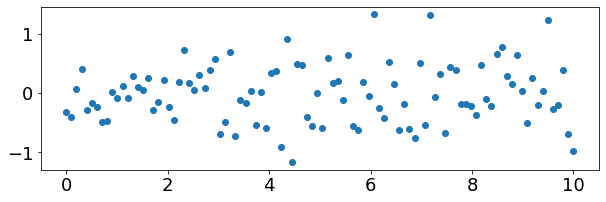

In [3]:
plt.figure(figsize=(10,3))
plt.scatter(df['X'], df['Y']);

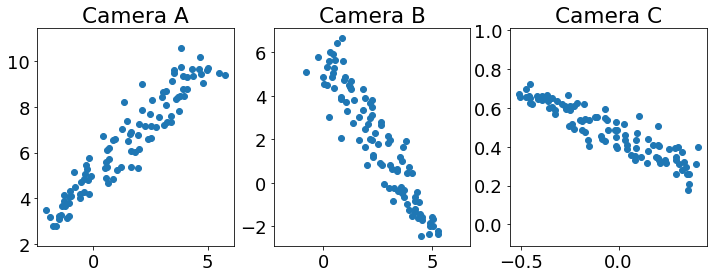

In [4]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))

ax[0].scatter(df['XA'], df['YA'])
ax[1].scatter(df['XB'], df['YB'])
ax[2].scatter(df['XC'], df['YC'])
for i, camera in zip(range(3), ['A', 'B', 'C']):
    ax[i].axis('equal');
    ax[i].set_title(f'Camera {camera}')

In [5]:
df.drop(['X', 'Y'], axis=1, inplace=True)
df.head()

,XA,YA,XB,YB,XC,YC
0,-1.776553,2.776553,5.273665,-2.341999,-0.513711,0.671529
1,-1.642174,2.785024,5.300263,-2.210007,-0.508473,0.659125
2,-1.901267,3.186967,4.844958,-2.356241,-0.479092,0.696856
3,-2.068229,3.496778,4.502490,-2.437328,-0.455363,0.722848
4,-1.505567,3.076967,5.053625,-2.002494,-0.476405,0.655873


### PCA

$$ X_{n \times m} \rightarrow X^{\text{reduced}}_{n \times k},\ \ \  \text{s.t.} \ \ \  k < m$$
                        
$$X_{n \times m} \cdot S_{m\times k} = X^{\text{reduced}}_{n \times k}$$

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

coordinates_pca = pca.fit_transform(df)

coordinates_pca[:5]

array([[ 7.09355295, -0.33994004],
       [ 6.95194317, -0.46795108],
       [ 6.80042408,  0.19288389],
       [ 6.65122526,  0.66901074],
       [ 6.52040145, -0.31763659]])

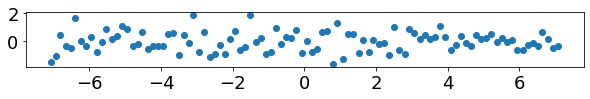

In [8]:
plt.figure(figsize=(10,1))
plt.scatter(coordinates_pca[:, 0], coordinates_pca[:, 1]);

In [9]:
pca.explained_variance_

array([17.26364136,  0.48262843])

In [10]:
pca.explained_variance_ratio_

array([0.97280395, 0.02719605])

In [11]:
np.cumsum(pca.explained_variance_ratio_)

array([0.97280395, 1.        ])

In [12]:
pca.components_[0]

array([-0.49245058, -0.50498006,  0.3603177 , -0.60636919, -0.06392884,
        0.02980316])

# Example 2. Digits (MNIST)

In [13]:
from sklearn.datasets import load_digits

In [14]:
X, y = load_digits(n_class=2, return_X_y=True)

In [15]:
X.shape

(360, 64)

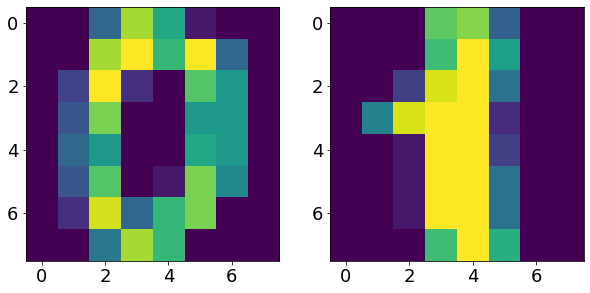

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(X[0].reshape(8,8));
ax[1].imshow(X[1].reshape(8,8));

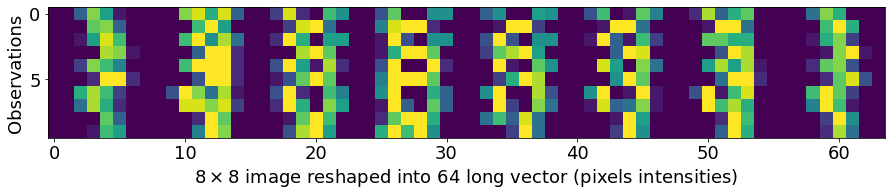

In [17]:
plt.figure(figsize=(15,3))
plt.imshow(X[:10])
plt.xlabel(f'$8 \\times 8$ image reshaped into $64$ long vector (pixels intensities)')
plt.ylabel('Observations');

In [18]:
pca = PCA(64)

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
explained_ratio = pca.explained_variance_ratio_
print(explained_ratio)

[0.43040435 0.16274709 0.09311904 0.0481117  0.03373734 0.03046753
 0.02836555 0.0219371  0.01716549 0.0143123  0.01212714 0.01068485
 0.01002833 0.00876953 0.00714164 0.00581915 0.00553103 0.0053655
 0.00453567 0.00409496 0.00407465 0.00378123 0.00319    0.00309997
 0.00297789 0.00271904 0.00256833 0.00224128 0.0020776  0.00196484
 0.00177042 0.00164573 0.00152814 0.0014591  0.00133163 0.00120422
 0.0011545  0.00104742 0.00086328 0.00076236 0.00071645 0.00062924
 0.00056803 0.00053536 0.00046164 0.00042826 0.00035639 0.00035173
 0.00001284 0.00000918 0.00000393 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [20]:
np.cumsum(explained_ratio)

array([0.43040435, 0.59315144, 0.68627047, 0.73438218, 0.76811952,
       0.79858705, 0.82695261, 0.84888971, 0.8660552 , 0.8803675 ,
       0.89249464, 0.90317948, 0.91320782, 0.92197735, 0.92911899,
       0.93493814, 0.94046918, 0.94583468, 0.95037035, 0.95446532,
       0.95853997, 0.9623212 , 0.96551119, 0.96861117, 0.97158906,
       0.97430809, 0.97687643, 0.9791177 , 0.98119531, 0.98316014,
       0.98493056, 0.98657629, 0.98810443, 0.98956353, 0.99089516,
       0.99209938, 0.99325388, 0.9943013 , 0.99516458, 0.99592694,
       0.99664339, 0.99727263, 0.99784066, 0.99837602, 0.99883766,
       0.99926591, 0.99962231, 0.99997404, 0.99998688, 0.99999607,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [21]:
pca = PCA(2)

pca.fit(X)

X_pca = pca.transform(X)

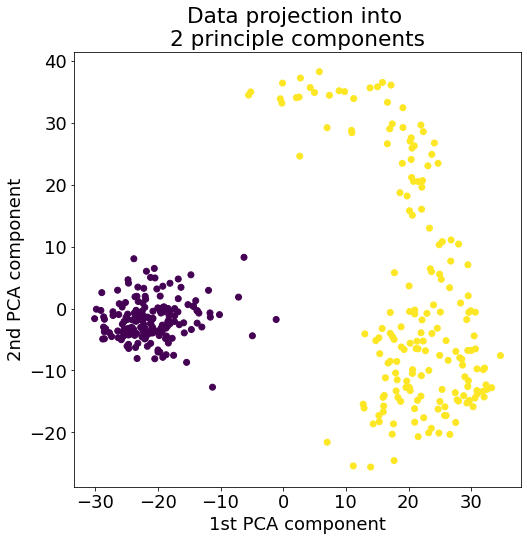

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')
plt.title('Data projection into \n2 principle components');

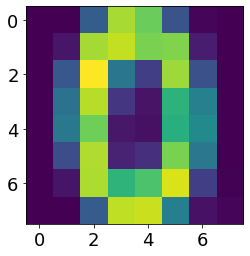

In [23]:
new_0 = [-20, 0]
plt.imshow(pca.inverse_transform(new_0).reshape(8,8));

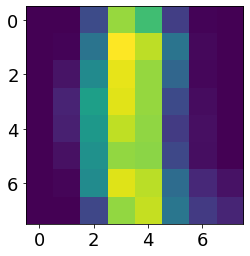

In [24]:
new_1 = [20, -10]
plt.imshow(pca.inverse_transform(new_1).reshape(8,8));

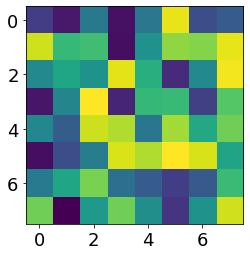

In [25]:
plt.imshow(np.random.rand(64).reshape(8,8));

## TSNE example

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(random_state=33)
X_tsne = tsne.fit_transform(X)

In [28]:
X_tsne.shape

(360, 2)

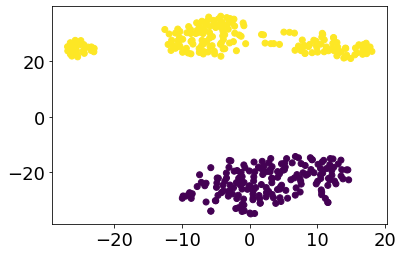

In [29]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y);

In [30]:
tsne = TSNE(random_state=33)
X_tsne = tsne.fit_transform(X)

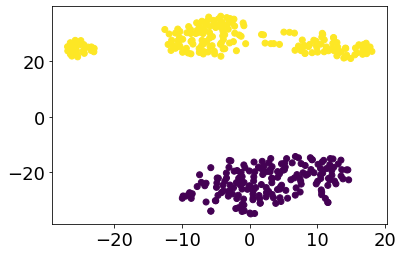

In [31]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y);

## Real data example (feature importance comparison)

In [32]:
df = pd.read_csv('./intro2ds_2020/seminar_6/gb_generated_features_train.csv')

In [33]:
pca = PCA(5)

pca.fit(df[['#Unique_Department','#Unique_Fineline','#UniqueScanCount','TotalScanCount','total_return']])

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca.explained_variance_ratio_

array([0.96781289, 0.0201543 , 0.00725869, 0.00358119, 0.00119292])

In [35]:
print(pca.components_[0])

[0.16412491 0.4712911  0.55564285 0.66498753 0.00056358]


![](https://downloader.disk.yandex.ru/preview/396663ce12499b40d3fce772ccface38aff242f9aa5968fea347a98f57295c6f/5f74928c/uk_d-oV0X9p5qT1aNoQlIQQZLaFJWQVmOY4MJ0mjv4HKcS-4cKdlKPArXCh_UXKN5MY8hrltubYmZHNjmh93ew==?uid=0&filename=feature_importance.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&tknv=v2&owner_uid=159868851&size=2048x2048)

# Why reduce the dimensionality?

Some of the reasons

- Reduce the noise
- Visualization purposes
- Data sampling